# Lecture 10. Metrics and Model Selection for Classification. Logistic Regression. Support Vector Machine (SVM)

In [51]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Denote margin by $M^{(i)} = y^{(i)}(w_0+\langle w,x^{(i)}\rangle).$ We can map it into the interval $[0, 1]$ by the following transform (logistic function):
$$
p=\sigma(M) = \frac{e^{M}}{1+e^{M}}=\frac{1}{1+e^{-M}}\quad\colon \mathbb{R}\to [0,\ 1].
$$
It can be interpretate as probability. The inverse transform
$$
M = \log\frac{p}{1-p}  \quad\colon [0,\ 1]\to \mathbb{R}
$$
is called *logit.*

Linear Regression returns values from $(-\infty,\ +\infty)$. The tipical threshold is $0$. Logistic Regression returns values from $[0,\ 1].$ The tipical threshhold is $0.5$.

Loss in case of linear classifier is

$$
\text{Loss}(a(x^{(i)}),\ y^{(i)}) = [sign(w_0+\langle w,x^{(i)}\rangle) = y^{(i)}] = [sign(M^{(i)})=y^{(i)}].
$$

Loss in case of logistic regression is derived from the Maximum Likelihood Principle

$$
\text{Log-Loss}(a(x^{(i)}),\ y^{(i)}) = \log (1+e^{-M^{(i)}})
$$

For SVM
$$
\text{Hinge-Loss}(a(x^{(i)}),\ y^{(i)}) = \max \{0,\ 1-M^{(i)}\}
$$

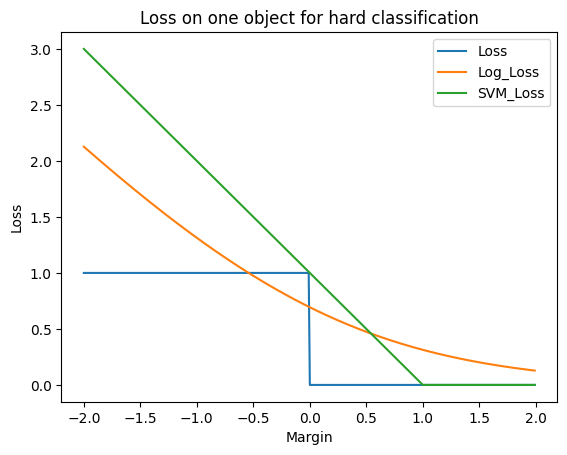

In [52]:
x = np.arange(-2,2,0.01).tolist()
Los = list(map(lambda x: 0 if x>0 else 1, x))
Log_Los = list(map(lambda x: np.log(1+np.exp(-x)), x))
SVM_Los = list(map(lambda x: np.max([0, 1-x]), x))
plt.plot(x,Los, label='Loss')
plt.plot(x,Log_Los, label='Log_Loss')
plt.plot(x,SVM_Los, label='SVM_Loss')
plt.title('Loss on one object for hard classification')
plt.xlabel('Margin')
plt.ylabel('Loss')
plt.legend()

In [53]:
from sklearn.datasets import make_blobs, make_moons, make_circles

In [54]:
X, y = make_moons(noise=0.1)

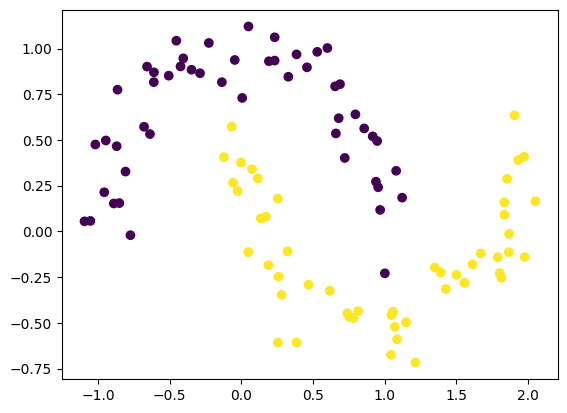

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [56]:
from sklearn.linear_model import LogisticRegression
clf_LogReg = LogisticRegression()
clf_LogReg.fit(X,y)

LogisticRegression()

The equation of the separator is
$$
w_0 + w_1 x + w_2 y =0,
$$
where $w_0 = model.intercept_$ and $[w_1, w_2] = model.coef_$

For visualisation we can solve it for $y$:
$$
y = -(w_0 + w_1 x)/w_2.
$$

In [57]:
clf_LogReg.intercept_, clf_LogReg.coef_

(array([0.20726388]), array([[ 1.07547275, -2.87050241]]))

In [58]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

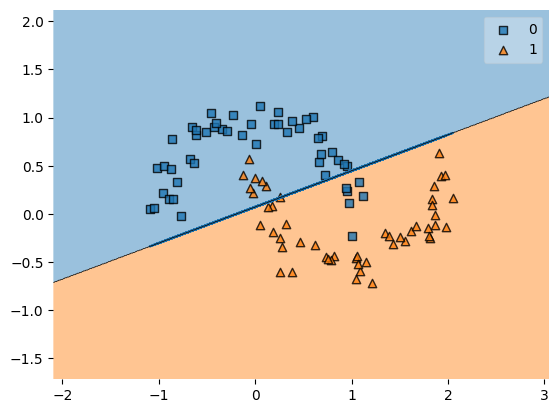

In [59]:
#plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(X[:,0], -(clf_LogReg.intercept_+clf_LogReg.coef_[0][0]*X[:,0])/clf_LogReg.coef_[0][1])
plot_decision_regions(X,y,clf_LogReg)

**Example 1.** Plot confusion matrix and calculate precision and recall for the threshold $th = 0.5$ and $th = 0.4.$

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

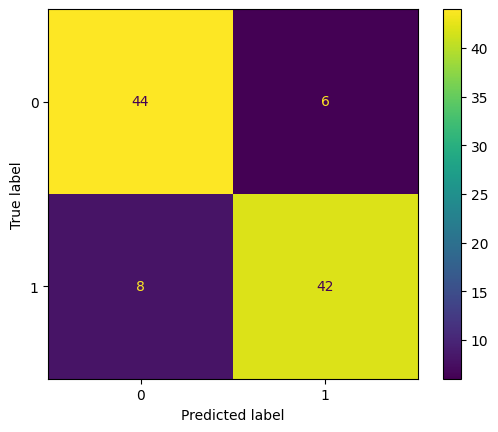

In [61]:
ConfusionMatrixDisplay.from_predictions(y, clf_LogReg.predict(X))

In [62]:
44/(44+7), 44/(44+6)

(0.8627450980392157, 0.88)

In [63]:
precision_score(y, clf_LogReg.predict(X)), recall_score(y, clf_LogReg.predict(X))

(0.875, 0.84)

In [64]:
y_pred_proba = clf_LogReg.predict_proba(X)[:,1]

In [65]:
clf_LogReg.classes_

array([0, 1])

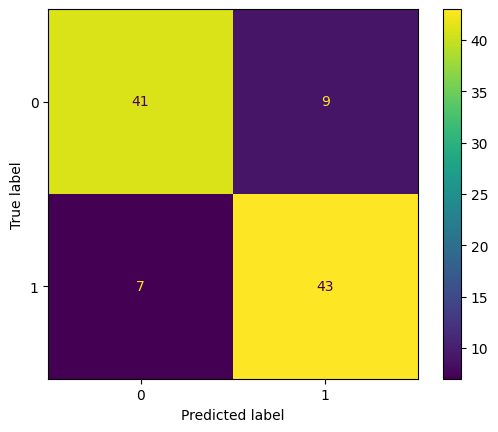

In [66]:
ConfusionMatrixDisplay.from_predictions(y, (y_pred_proba > 0.4).astype(int))

In [67]:
45/(45+8), 45/(45+5)

(0.8490566037735849, 0.9)

In [68]:
precision_score(y, (y_pred_proba > 0.4).astype(int)), recall_score(y, (y_pred_proba > 0.4).astype(int)) #changing this threshold we can reach higher recall or precision

(0.8269230769230769, 0.86)

**Example 2.** Plot precision, recall, and $f_1$-score as functions of threshhold.

In [69]:
precision, recall, thresh = precision_recall_curve(y, y_pred_proba)
f1 =  2 * (precision * recall) / (precision + recall)

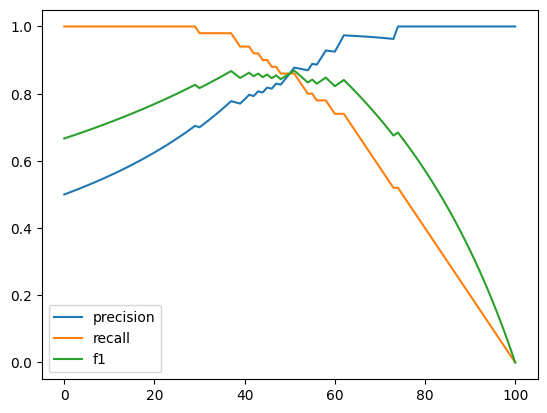

In [70]:
plt.plot(precision, label='precision')
plt.plot(recall, label='recall')
plt.plot(f1, label='f1')
plt.legend()

If we want to maximize both precision and recall, we can use $F$-measure
$$
F_{\beta} = (1+\beta) \frac{precision\times recall}{\beta (precision+recall)}
$$
\
$$
F_1 =  \frac{2}{\dfrac{1}{precision}+\dfrac{1}{recall}} = 2\frac{precision\times recall}{precision+recall}
$$
**Find maximum f1**

In [71]:
np.argmax(f1)

51

In [72]:
thresh[np.argmax(f1)] #set this threshold for highest precision, recall, and f1scores above

0.49178468134424

**Example 3.** Plot PR and ROC curves

# Precision - Recall Curve
## Comment: we could do model selection using only accuracy or f1 measure, but my goal is to make you familiar with area under the curve (AUC) measure of quality.

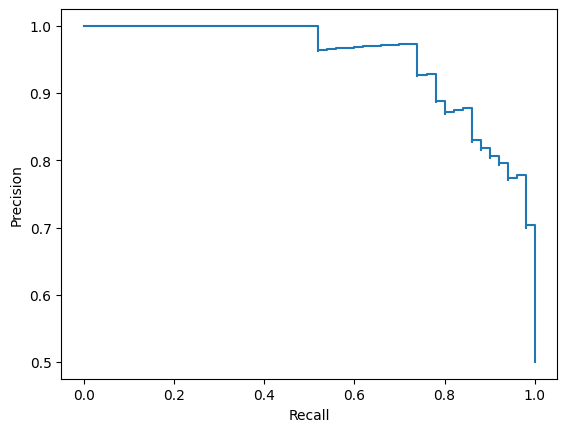

In [73]:
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

# ROC curve


$$
TPR = \frac{TP}{TP+FN}
$$

$$
FPR = \frac{FP}{FP+TN}
$$

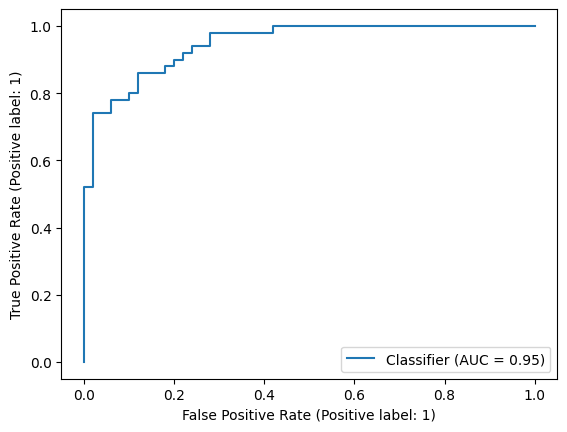

In [74]:
RocCurveDisplay.from_predictions(y, y_pred_proba)

# Nonlinear features

You can use the following model
$$
a(x) = w_0 + w_1 \phi_1(x) + w_2\phi_2(x)+\ldots+w_K \phi_K(x).
$$

For example,
$$
a(x) = w_0 + w_1 x^2 + w_2\sin x.
$$

##Custom Transform

In [75]:
class MyTransform:
  def fit(self, X, y=None, sample_weight=None):
    #self.col = 3
    self.X = X
    return self

  def transform(self, X, y=None, sample_weight=None):
    return np.hstack([X, X**2, (X[:,0]*X[:,1]).reshape(-1,1)])
    #return np.hstack([np.exp(-((X-self.X[j,:])**2).dot(np.array([[1],[1]]))) for j in range(len(self.X))]) #np.hstack((X, X[:,self.col].reshape(-1,1)**(2)))

  def __str__(self):
    return "my_transform()"

  def __repr__(self):
    return "my_transform()"

In [76]:
my_transform = MyTransform()
my_transform.fit(X)
print(X[0])
print(my_transform.transform(X)[0])

[0.60095853 1.00262491]
[0.60095853 1.00262491 0.36115116 1.00525671 0.60253599]


In [77]:
from sklearn.pipeline import Pipeline

In [78]:
pipe = Pipeline([('my_transformer', MyTransform()), ('classifier', LogisticRegression())])

In [79]:
pipe.fit(X,y)

Pipeline(steps=[('my_transformer', my_transform()),
                ('classifier', LogisticRegression())])

<Axes: >

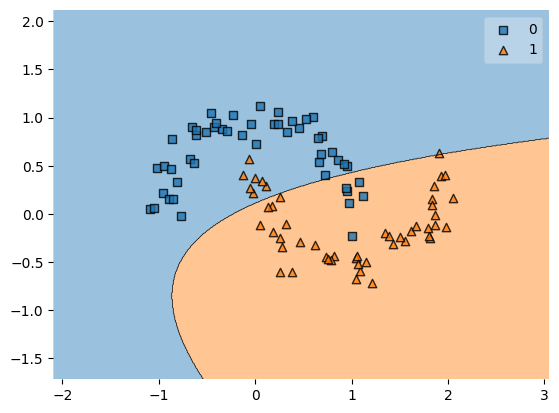

In [80]:
plot_decision_regions(X,y,pipe)

##Polynomial transform

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
poly = PolynomialFeatures(3) #creates (1, x1, x2, x1^2, x1*x2, x2^2, x1^3,...)

In [83]:
poly.fit_transform(X)[0]

array([1.        , 0.60095853, 1.00262491, 0.36115116, 0.60253599,
       1.00525671, 0.21703687, 0.36209914, 0.60411759, 1.00789541])

In [84]:
pipe1 = Pipeline([('poly', PolynomialFeatures(3)), ('classifier', LogisticRegression())])

In [85]:
pipe1.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('classifier', LogisticRegression())])

<Axes: >

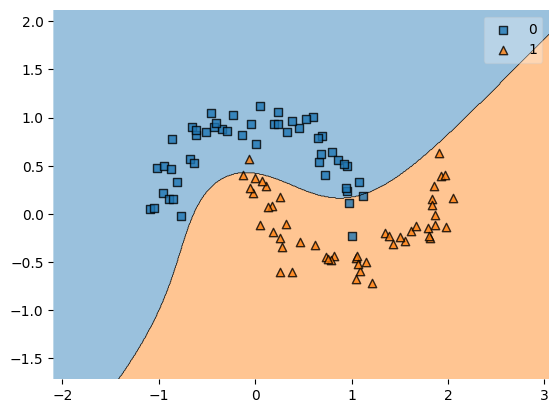

In [86]:
plot_decision_regions(X,y,pipe1)

#Let's try SVM classifier

**Problem 1. [1pt]** Create [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) object, train on $X$ and $y$ and report ROC-AUC. Plot decision boundary.

In [87]:
from sklearn.svm import SVC


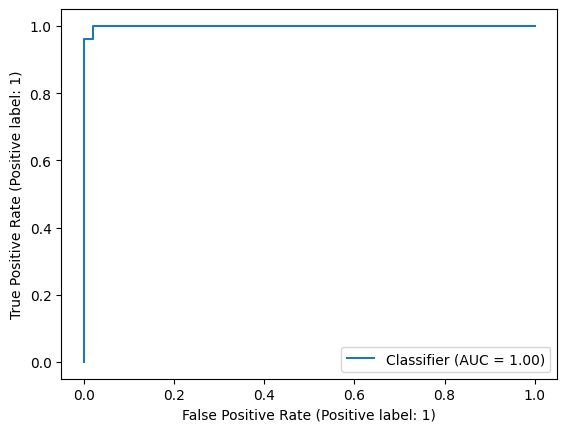

In [88]:
clf_SVC = SVC(probability=True)
clf_SVC.fit(X,y)

y_pred_proba = clf_SVC.predict_proba(X)[:,1]
RocCurveDisplay.from_predictions(y, y_pred_proba)

 This result is due to the default RBF [`kernal`](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py). Radial basis functions (RBF) aka Gaussian kernal are functions centered at each point of our dataset
$$
a(x) = w_0 + w_1 K(x,x^{(1)}) +\ldots + w_N w_1 K(x,x^{(N)}),
$$
where
$$
K(x,a) = e^{-\gamma |x-a|^2}.
$$

**Problem 2. [3pt]** Use `kernal='linear'` and `C=1` in SVC. Plot desicion boundary and supporting vectors. Repeat for `C=0.2` and `C=5`.

*Hint:* 1) For the point on the support $|w_0+w_1x+w_2y|=1,$ this will help you to detect the support vectors (points on the support). `np.isclose(|w_0+w_1x+w_2y|, 1, atol=0.1)` may be useful, because of the numerical errors.  

2) The width of the margin is $2|w|.$ You'll need to plot two lines on the distance $|w|$ from the separator.


[[-1.09414271  0.0550139 ]
 [ 1.8545776   0.28756584]
 [-0.88994713  0.15260936]
 [ 0.6890475   0.80505423]
 [ 0.46920464 -0.29134414]
 [-0.85111549  0.15476608]
 [ 0.65484113  0.79294616]
 [-1.0535396   0.05719721]
 [ 0.28108193 -0.34741207]]


<Axes: >

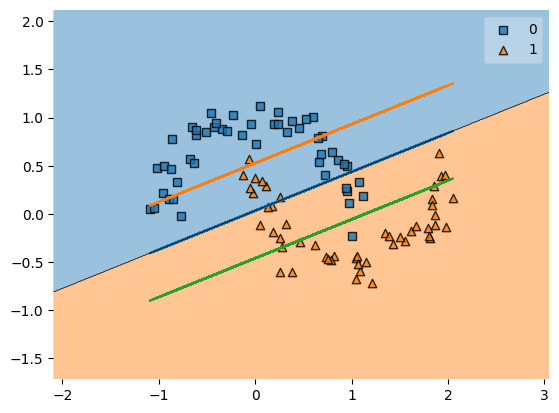

In [89]:
clf_SVC = SVC(probability=True, kernel="linear", C=1)
clf_SVC.fit(X,y)

plt.plot(X[:,0], -(clf_SVC.intercept_+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])

list_points_margin_1 = []
for value, yy in zip(X, y):
  if (np.isclose(abs(clf_SVC.intercept_ + np.dot(clf_SVC.coef_[0], value)), 1, atol=0.1)):
      list_points_margin_1.append(value)

list_points_margin_1 = np.array(list_points_margin_1)

print(list_points_margin_1)

plt.plot(X[:,0], -(clf_SVC.intercept_+1+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])
plt.plot(X[:,0], -(clf_SVC.intercept_-1+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])



plot_decision_regions(X,y,clf_SVC)

[[ 0.60095853  1.00262491]
 [ 1.83523091  0.15895541]
 [-0.80807335  0.32714302]
 [ 0.32843274  0.84557253]
 [ 0.45842889  0.89711992]
 [ 0.38588967 -0.60709277]
 [-0.95633225  0.21393126]
 [ 1.83684944  0.09056695]
 [ 0.25526429 -0.60789991]
 [ 2.05289161  0.16507594]
 [ 0.81495487 -0.43614716]
 [ 0.7836369  -0.47407819]
 [ 1.00206124 -0.22941488]
 [ 0.52993127  0.98179829]
 [ 0.38558666  0.96790461]
 [ 0.00636934  0.72970608]
 [ 0.74013974 -0.44784513]
 [ 0.75356643 -0.46768669]]


<Axes: >

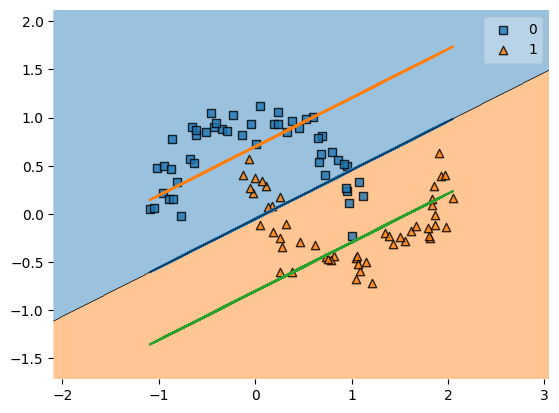

In [90]:
clf_SVC = SVC(probability=True, kernel="linear", C=0.2)
clf_SVC.fit(X,y)

plt.plot(X[:,0], -(clf_SVC.intercept_+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])

list_points_margin_1 = []
for value, yy in zip(X, y):
  if (np.isclose(abs(clf_SVC.intercept_ + np.dot(clf_SVC.coef_[0], value)), 1, atol=0.1)):
      list_points_margin_1.append(value)

list_points_margin_1 = np.array(list_points_margin_1)

print(list_points_margin_1)

plt.plot(X[:,0], -(clf_SVC.intercept_+1+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])
plt.plot(X[:,0], -(clf_SVC.intercept_-1+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])



plot_decision_regions(X,y,clf_SVC)

[[ 0.79646149  0.63998721]
 [ 0.67984204  0.61888684]
 [ 1.8545776   0.28756584]
 [-0.88994713  0.15260936]
 [-0.12168371  0.4061122 ]
 [ 0.18891754 -0.18478872]
 [-0.85111549  0.15476608]]


<Axes: >

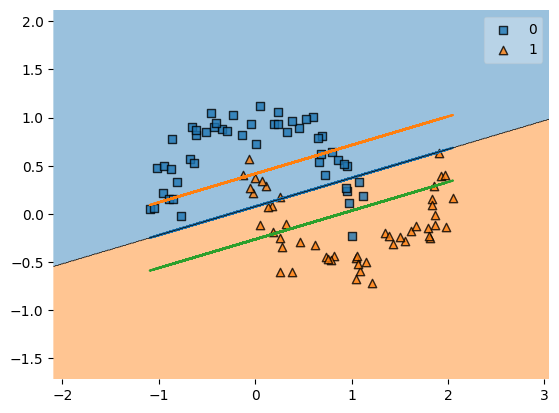

In [91]:
clf_SVC = SVC(probability=True, kernel="linear", C=5)
clf_SVC.fit(X,y)

plt.plot(X[:,0], -(clf_SVC.intercept_+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])

list_points_margin_1 = []
for value, yy in zip(X, y):
  if (np.isclose(abs(clf_SVC.intercept_ + np.dot(clf_SVC.coef_[0], value)), 1, atol=0.1)):
      list_points_margin_1.append(value)

list_points_margin_1 = np.array(list_points_margin_1)

print(list_points_margin_1)

plt.plot(X[:,0], -(clf_SVC.intercept_+1+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])
plt.plot(X[:,0], -(clf_SVC.intercept_-1+clf_SVC.coef_[0][0]*X[:,0])/clf_SVC.coef_[0][1])



plot_decision_regions(X,y,clf_SVC)

# Logistic Regression as Probabilistic Model

If we take $\sigma$ of the margin as probability, then maximum likelihood estimation takes form
$$
\prod_{i=1}^{N} \frac{1}{1+e^{-y^{(i)}w^T x^{(i)}}} \to \underset{w}{\max}
$$
It is possible to prove that it is a real probability, i.e., it coinsides with fractions of positive samples in bins.

# Calibration of Models

In [92]:
clf_SVM = SVC(gamma='auto', probability=True)
clf_Log = LogisticRegression(C=1)

In [93]:
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
import matplotlib

In [94]:
clf_list = [
    (clf_Log, "Logistic"),
    (clf_SVM, "SVM"),
]

Text(0.5, 1.0, 'Calibration plots (Support Vector Machine)')

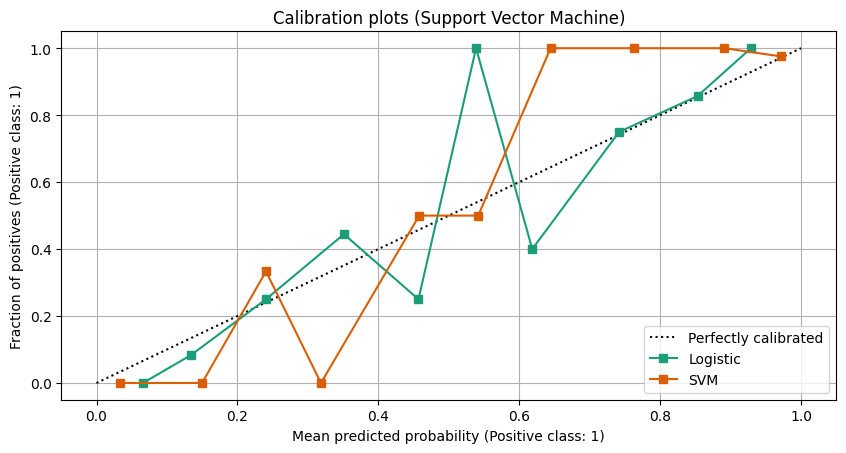

In [95]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = matplotlib.colormaps["Dark2"]

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X, y)
    display = CalibrationDisplay.from_estimator(
        clf,
        X,
        y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Support Vector Machine)")